In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

In [3]:
dataset= pd.read_csv("D:VOF.L.csv")

In [4]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,272.0,275.000000,272.000000,273.25,233.939148,170046
1,2017-01-04,272.0,275.000000,272.000000,272.75,233.511093,107823
2,2017-01-05,272.0,274.500000,270.250000,272.50,233.297043,391623
3,2017-01-06,272.5,273.750000,266.000000,273.00,233.725098,464329
4,2017-01-09,273.0,273.500000,270.000000,273.50,234.153183,276108
...,...,...,...,...,...,...,...
1323,2022-03-25,502.0,507.000000,502.000000,507.00,493.078217,265108
1324,2022-03-28,502.0,511.000000,502.000000,506.00,492.105652,115303
1325,2022-03-29,502.0,520.000000,500.000000,518.00,503.776154,149574
1326,2022-03-30,516.0,516.989990,507.666992,513.00,498.913422,65890


<AxesSubplot:>

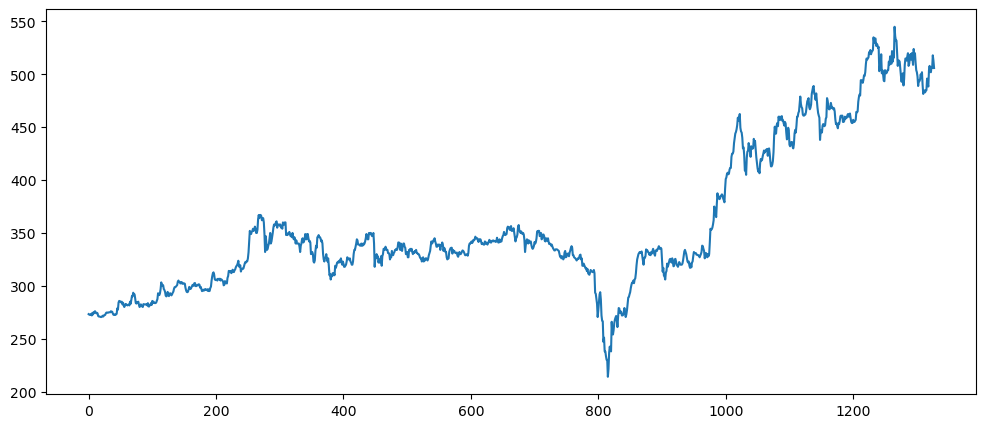

In [6]:
dataset['Close'].plot(figsize=(12,5))

In [8]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [10]:
adf_test(dataset['Close'])

Augmented Dickey-Fuller Test: 
ADF test statistic        -0.458098
p-value                    0.899937
# lags used                0.000000
# observations          1327.000000
critical value (1%)       -3.435287
critical value (5%)       -2.863720
critical value (10%)      -2.567931
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [11]:
from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[[‘Low’, ‘High’,’Open’, ‘Close’, ‘Volume’, ‘Adj Close’, ‘Mean’]])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

SyntaxError: invalid character '‘' (U+2018) (2108463201.py, line 3)

In [12]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[[‘Actual’]])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

SyntaxError: invalid character '‘' (U+2018) (3999727475.py, line 2)

In [14]:
dataset_n = dataset.values
sc = MinMaxScaler(feature_range = (0,1))
data_scaled = sc.fit_transform(dataset)

NameError: name 'MinMaxScaler' is not defined

In [15]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM, Flatten
from keras.layers import ConvLSTM2D
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [16]:
dataset_n = dataset.values
sc = MinMaxScaler(feature_range = (0,1))
data_scaled = sc.fit_transform(dataset)

ValueError: could not convert string to float: '2017-01-03'

In [20]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = dataset.Close[:round(len(dataset)*0.8)]
test = dataset.Close[round(len(dataset)*0.8):]

In [21]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train,order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1062
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2916.176
Date:                Tue, 03 Jan 2023   AIC                           5834.352
Time:                        20:29:30   BIC                           5839.319
Sample:                             0   HQIC                          5836.234
                               - 1062                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        14.2842      0.289     49.474      0.000      13.718      14.850
===================================================================================
Ljung-Box (L1) (Q):                   4.16   Jarque-Bera (JB):              2339.56
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.75   Skew:                            -0.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [22]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'Close')]

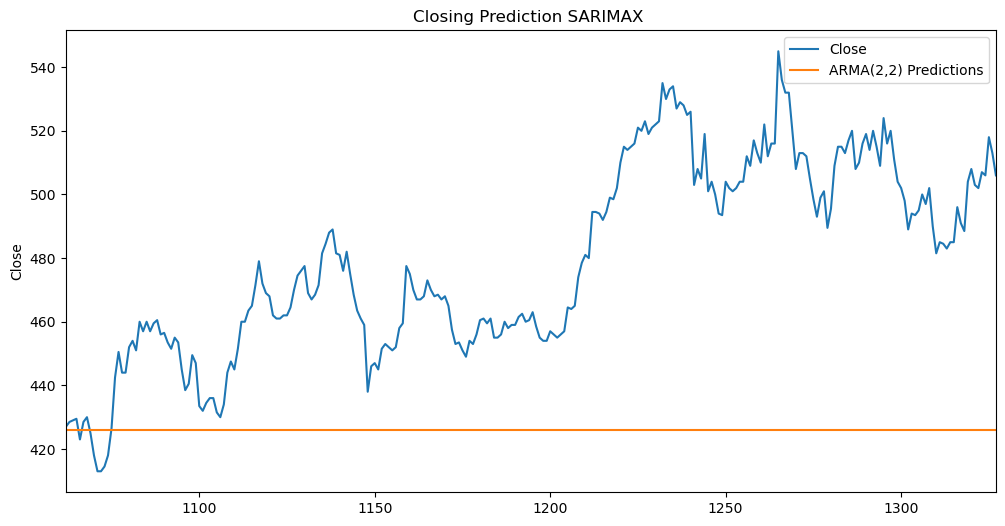

In [23]:
title = 'Closing Prediction SARIMAX '
ylabel='Close'
xlabel=''

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [24]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
ARIMAmodel = ARIMA(train, order = (2, 2, 2))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
mape = mean_absolute_percentage_error(test.values, y_pred_df["Predictions"])
print("MAPE: ", mape * 100)

RMSE:  40.57683013280731
MAPE:  6.9945017335128545


In [26]:
train = dataset.Close[:round(len(dataset)*0.7)]
test = dataset.Close[round(len(dataset)*0.7):]

In [27]:
model = sm.tsa.arima.ARIMA(train,order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  930
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -2497.556
Date:                Tue, 03 Jan 2023   AIC                           4997.113
Time:                        20:31:21   BIC                           5001.947
Sample:                             0   HQIC                          4998.956
                                - 930                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        12.6669      0.246     51.399      0.000      12.184      13.150
===================================================================================
Ljung-Box (L1) (Q):                   0.86   Jarque-Bera (JB):              3440.98
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               2.21   Skew:                            -0.37
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

[Text(0.5, 0, ''), Text(0, 0.5, 'Close')]

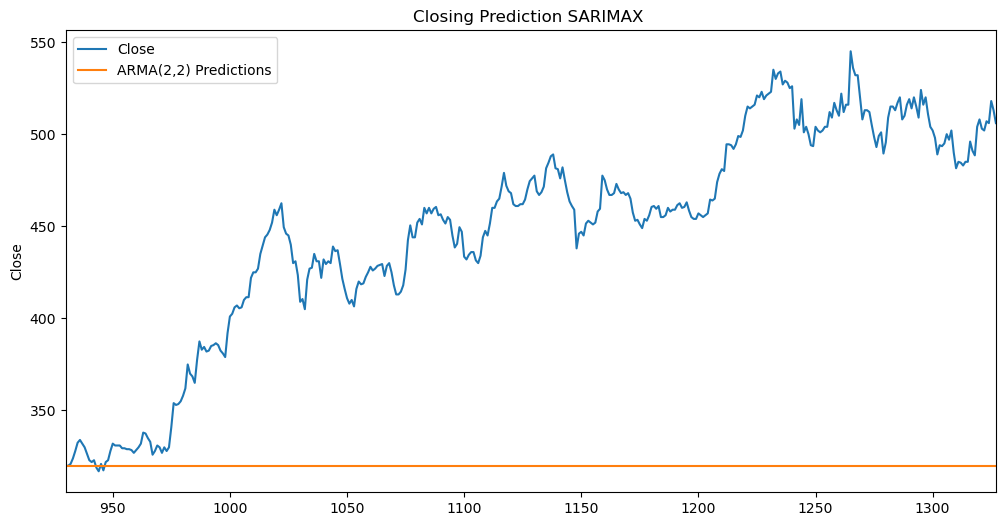

In [29]:
title = 'Closing Prediction SARIMAX '
ylabel='Close'
xlabel=''

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

In [30]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
ARIMAmodel = ARIMA(train, order = (0, 1, 0))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
mape = mean_absolute_percentage_error(test.values, y_pred_df["Predictions"])
print("MAPE: ", mape * 100)

RMSE:  139.65066565213868
MAPE:  27.047613593135512


In [32]:
train = dataset.Close[:round(len(dataset)*0.9)]
test = dataset.Close[round(len(dataset)*0.9):]

In [33]:
model = sm.tsa.arima.ARIMA(train,order=(0,1,0))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 1195
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3335.019
Date:                Tue, 03 Jan 2023   AIC                           6672.038
Time:                        20:32:25   BIC                           6677.124
Sample:                             0   HQIC                          6673.954
                               - 1195                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        15.6179      0.313     49.936      0.000      15.005      16.231
===================================================================================
Ljung-Box (L1) (Q):                   7.46   Jarque-Bera (JB):              2035.34
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                            -0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end).rename('ARMA(2,2) Predictions')

In [36]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
ARIMAmodel = ARIMA(train, order = (0, 1, 0))
ARIMAmodel = ARIMAmodel.fit()

y_pred = ARIMAmodel.get_forecast(len(test.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = ARIMAmodel.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = test.index
y_pred_out = y_pred_df["Predictions"] 


import numpy as np
from sklearn.metrics import mean_squared_error

arma_rmse = np.sqrt(mean_squared_error(test.values, y_pred_df["Predictions"]))
print("RMSE: ",arma_rmse)
from sklearn.metrics import mean_absolute_percentage_error
from math import sqrt
mape = mean_absolute_percentage_error(test.values, y_pred_df["Predictions"])
print("MAPE: ", mape * 100)

RMSE:  46.72592460374848
MAPE:  8.40540796099591


[Text(0.5, 0, ''), Text(0, 0.5, 'Close')]

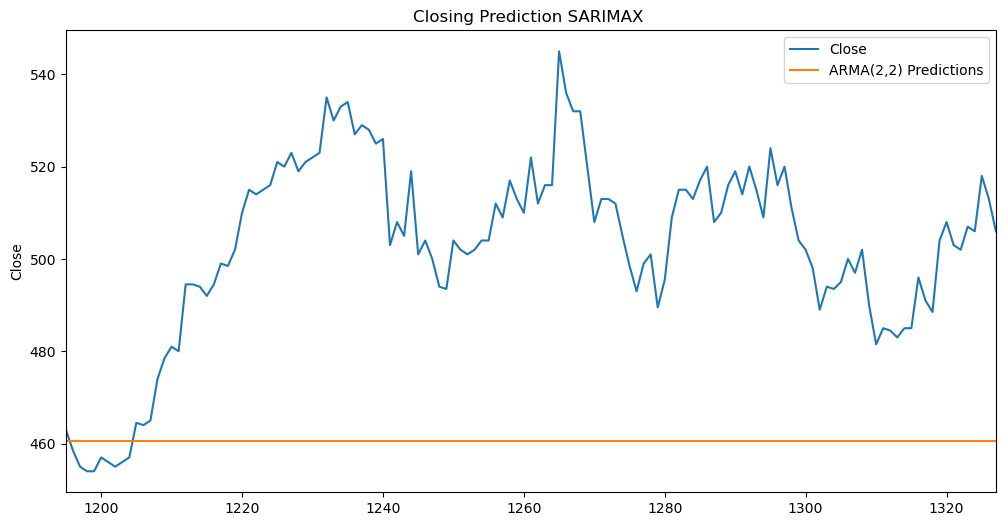

In [37]:
title = 'Closing Prediction SARIMAX '
ylabel='Close'
xlabel=''

ax = test.plot(legend=True,figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)